In [1]:
import pandas as pd
import numpy as np 


In [2]:
data_file = pd.read_csv('Customer-Churn-Dataset.csv')
df = data_file.copy()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data understanding / Exploratory Data Understanding-- 

CustomerID -- unique ID,   not that important 
PaperlessBilling, OnlineBackup, StreamingTV, StreamingMovies, PaymentMethod — may be less correlated with churn- as they are more a matter a choice and preferences 
may be a combination might be useful --



Partner-- shows relationship 
Dependents -- has dependents or not like family and childeren , family guy me sticklonger 
tensure -- time period spend , longer time -- churn risk 
phoneservices -- using some phone services or not 
Contract -- contract churn type 
i think combing the low-value, medium-value, and high-value customers based on tensure and chargers can get me some result `



Cycle of the project -- 
Data Cleaning  →  EDA  →  Feature Engineering  
→  Segmentation  →  Model Building  →  Dashboard  
→  Retention Strategy  →  Feedback Loop hjb



In [4]:
df1 = df.drop(['customerID'], axis =1 )

In [24]:
df1['gender'] = df1['gender'].replace({'Male': 1, 'Female': 0}).astype(int)
df1['Partner'] = df1['Partner'].replace({'Yes': 1, 'No': 0}).astype(int)
df1['Dependents'] = df1['Dependents'].replace({'Yes': 1, 'No': 0}).astype(int)
df1['PhoneService'] = df1['PhoneService'].replace({'Yes': 1, 'No': 0}).astype(int)
df1['PaperlessBilling'] = df1['PaperlessBilling'].replace({'Yes': 1, 'No': 0}).astype(int)
df1['Churn'] = df1['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)
df1 = df1.replace('No phone service', 'No')
df1 =  df1.replace('No internet service', 'No')

In [25]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

df1[cols] = df1[cols].replace({'Yes' :1, 'No': 0}).astype(int)

In [7]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [8]:
df2 = df1.copy()

In [9]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
df2.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df2.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [12]:
df2[df2['TotalCharges'].str.contains(' ')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,,0
753,1,0,0,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.25,,0
936,0,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Mailed check,80.85,,0
1082,1,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,,0
1340,0,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,,0
3331,1,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.85,,0
3826,1,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.35,,0
4380,0,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.00,,0
5218,1,0,1,1,0,1,0,No,0,0,0,0,0,0,One year,1,Mailed check,19.70,,0
6670,0,0,1,1,0,1,1,DSL,0,1,1,1,1,0,Two year,0,Mailed check,73.35,,0


In [13]:
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')
df2.dropna(subset=['TotalCharges'], inplace=True)
df2['TotalCharges'].isnull().sum()


np.int64(0)

In [14]:
df3 = df2.copy()

In [15]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [16]:
#One-hot encode categorical columns

df3 = pd.get_dummies(df3, columns= ['InternetService', 'Contract', 'PaymentMethod'], drop_first= True)
bool_cols = df3.select_dtypes(include=['bool']).columns
df3[bool_cols] = df3[bool_cols].astype(int)

In [17]:
df4  = df3.copy()

CLEAN dataset DF4


In [18]:
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0



Exploratory Data analysis using DF2


In [19]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

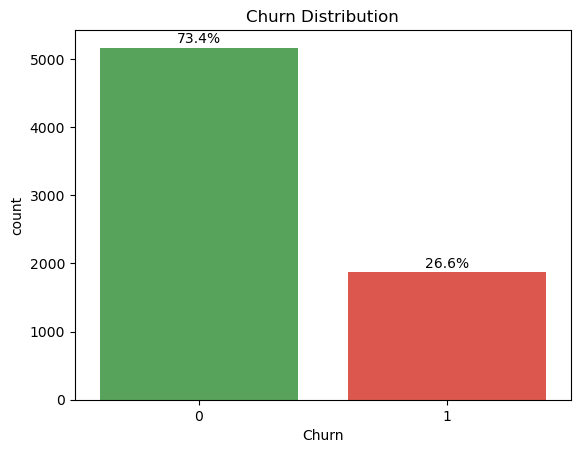

In [21]:

ax = sns.countplot(x='Churn', data=df2, hue='Churn', palette=['#4CAF50', '#F44336'], legend=False)

plt.title('Churn Distribution')

total = len(df2)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100 
    ax.text(
        x= p.get_x() + p.get_width() / 2,
        y = height + 0.01 * total,
        s = f'{percentage:.1f}%',
        ha = 'center'
    ) 


categorical_cols ['InternetService', 'Contract', 'PaymentMethod']
numerical_cols ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


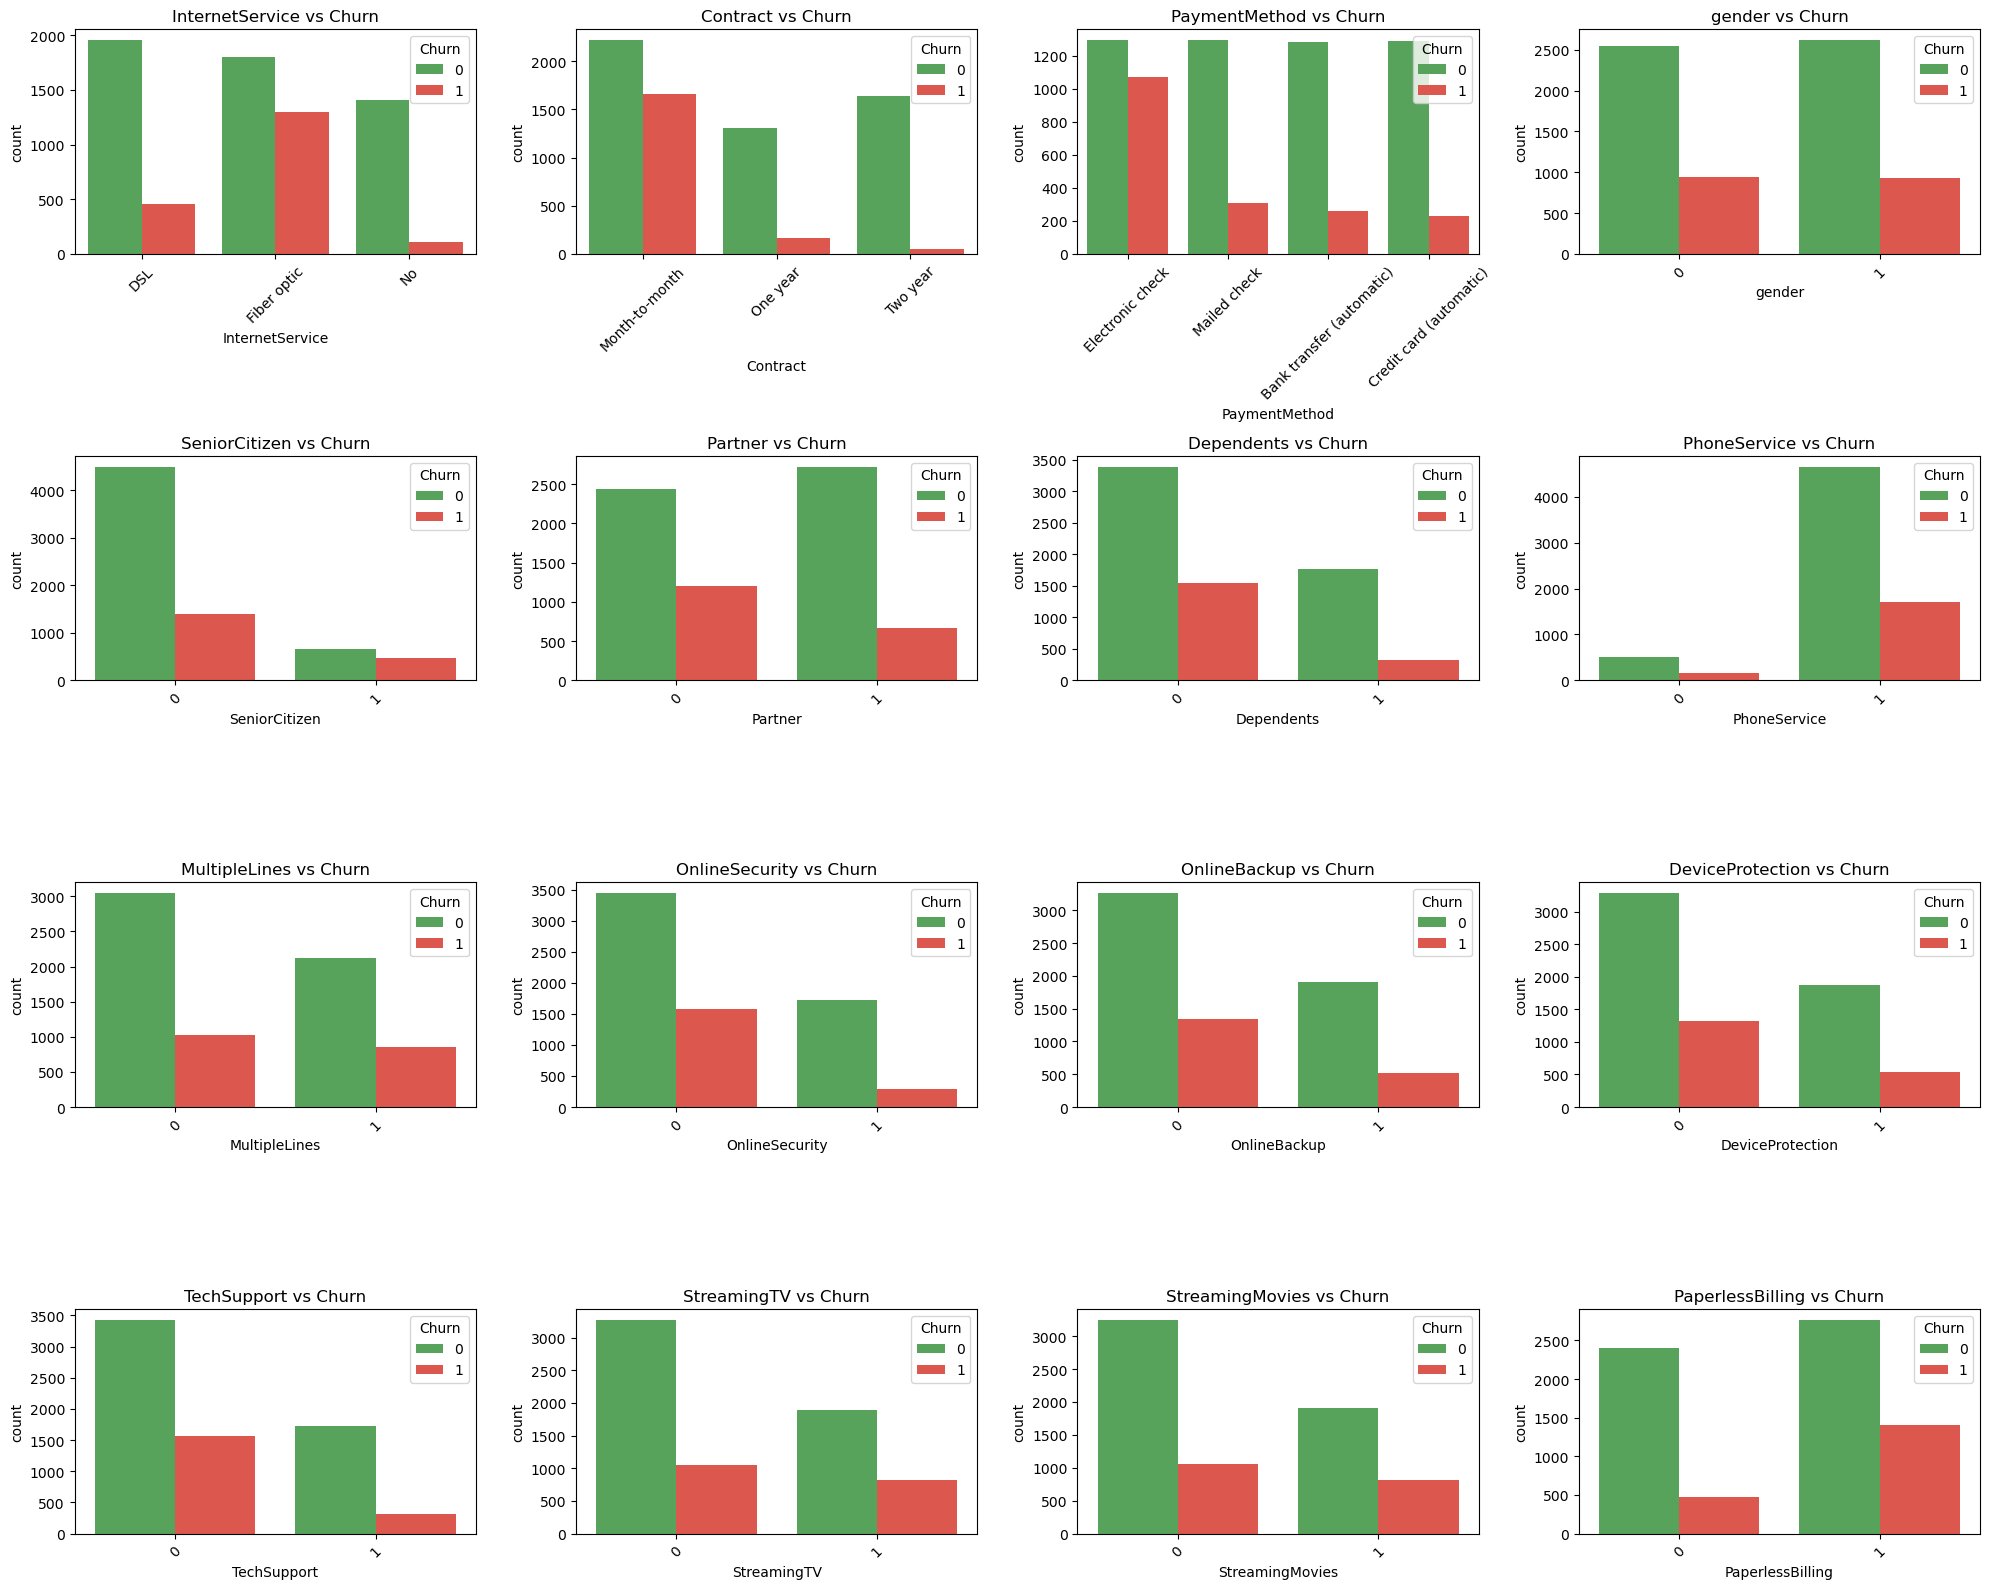

In [22]:
categorical_cols = df2.select_dtypes(include=['object','bool', 'category']).columns.tolist()
numerical_cols = df2.select_dtypes(include = ['int64', 'float']).columns.tolist()

if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')
if 'Churn' in numerical_cols:
    numerical_cols.remove('Churn')


numerical_cols.remove('tenure')
numerical_cols.remove('TotalCharges')
numerical_cols.remove('MonthlyCharges')

print("categorical_cols", categorical_cols)
print("numerical_cols", numerical_cols)

all_cols = categorical_cols + numerical_cols

n = len(all_cols)

# 4 grid 
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()  

for i, col in enumerate(all_cols):
    sns.countplot(data=df2, x=col, hue='Churn', palette=['#4CAF50', '#F44336'], ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



###1. Internet Service (DSL / Fiber Optic / No Internet Service)

###Fiber optic users have the highest churn.
→ This suggests there may be issues such as reliability, pricing, or customer satisfaction specific to fiber-optic customers.###


Customers with no internet service rarely churn.
→ Makes sense because they only use phone service, so fewer things can go wrong.

2. Contract Type (Month-to-Month, One-Year, Two-Year)

Month-to-month customers churn the most.
→ This group has high flexibility and no commitment, so they can leave anytime.

One-year or two-year contract customers churn much less.
→ Because they already committed financially and are more stable.

3. Payment Method (Electronic Check, Credit Card, etc.)

Electronic check users have the highest churn.
→ This might be due to:

higher fees

older systems

customers using this method might be less satisfied

billing issues
→ Worth exploring further.

4. Gender

No significant difference.

Gender is not a strong predictor of churn.

5. Senior Citizen

Small difference, not strong.

Being a senior citizen does not significantly impact churn alone.

6. Partner

Customers without a partner churn more.
→ Reason: customers with partners may value stability and stick longer to predictable services.

7. Dependents

Customers without dependents churn more.
→ Having dependents may reduce mobility or increase the need for stable services.

8. Phone Service

No strong insight — because customers who have “No phone service” are very few.

Not a meaningful churn predictor.

9. Online Security

Customers without online security churn more.
→ Suggests that lack of security features reduces satisfaction or trust.

10. Online Backup

Customers without online backup churn more.
→ Indicates the importance of backup services in retention.

11. Device Protection

Customers without device protection churn more.
→ Customers value device-related safety nets.

12. Tech Support

No tech support = high churn.
→ Support quality is one of the strongest churn drivers.

13. Streaming TV & Streaming Movies

Minimal difference.

Entertainment services do not strongly influence churn — customers don’t depend on these features to make stay/leave decisions.

14. Paperless Billing

Paperless billing customers churn more.
→ Could signal:

dissatisfaction with digital billing

confusion with electronic charges

customers who enroll in paperless might also be cost-sensitive (more churn-prone)###

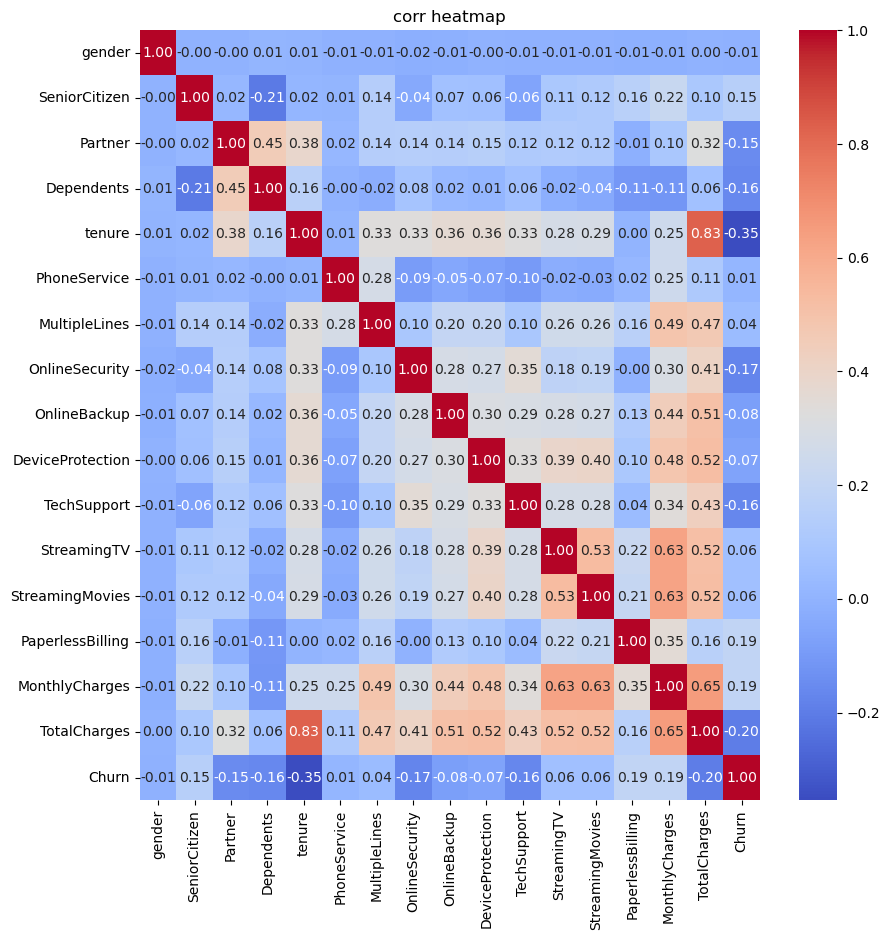

In [23]:



numeric_df = df2.select_dtypes(include =['float','int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', fmt = ".2f")
plt.title('corr heatmap')
plt.show()